In [4]:
import matplotlib.pyplot as plt
from stackstac import mosaic

from sentinel2_wrappers.pystac import catalogue_search, data_fetch
from sentinel2_wrappers.utils import constants, visualisation

###  1. define an Area of interest (AOI)

In [5]:
# a very simple a
km2deg = 1.0 / 111
x, y = (113.887, -25.843)  # Center point of a query, Madagascar
dx = 20 #km
dy = 20
rx = dx * km2deg
ry = dy*km2deg
bbox = (x - rx, y - ry, x + rx, y + ry)
bbox_km = (x-dx, y-dy, x+dx, y+dy)


### 2. search catalogues

In [6]:
query_res = catalogue_search.search_catalogue(bbox, catalogue = constants.CATALOGUES[constants.AWS_EARTH_SEARCH_v1], collections = ['sentinel-2-l2a'])
gdf = catalogue_search.parse_results(query_res)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

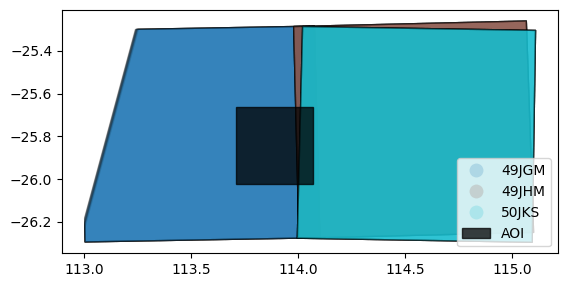

In [7]:
#visualise the granules
visualisation.visualise_granules_pystac(gdf, query_res)

##. 3 Download single granule result that best covers AOI

In [8]:
# gets the whole area not the AOI only
vis = data_fetch.download_top_result(gdf, query = query_res, band = 'visual')


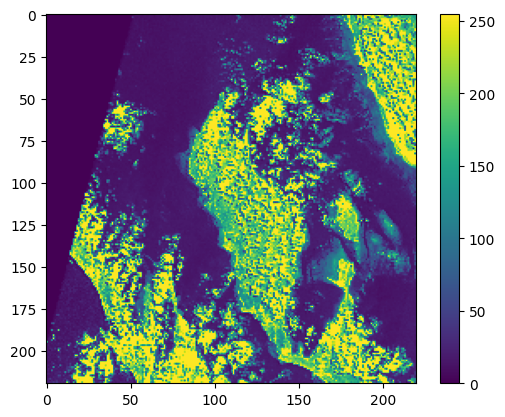

In [9]:
downsampling = 50 # save time plotting
plt.imshow(vis.values[0,::downsampling,::downsampling])
plt.colorbar()

### get AOI RGB image
now get only the AOI, find all granules needed to cover it and stac them

In [10]:
granules_list = catalogue_search.get_granule_list(gdf, query=query_res)

In [11]:
# the different granules stacked in the time direction. 
# Limit to bbox reduces removes the data outside the AOI
# decrease the resolution or AOI size if you want to further speed up computation and plotting
collated_data = data_fetch.fetch_aoi_data(granules_list, query_res, ['red','green','blue'], resolution = 10, limit_to_bbox=True)
# combined into a mosaic
mosaic = data_fetch.make_mosaic(collated_data)
# combined using median value where there is multile data
median = data_fetch.compute_median_image(collated_data)

/Users/Ivan/Documents/python/sat-data/.venv/lib/python3.11/site-packages/stackstac/prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


In [12]:
# select sub bands if you want/need
rgb = collated_data.sel(band=["red", "green", "blue"])


## 4. plots

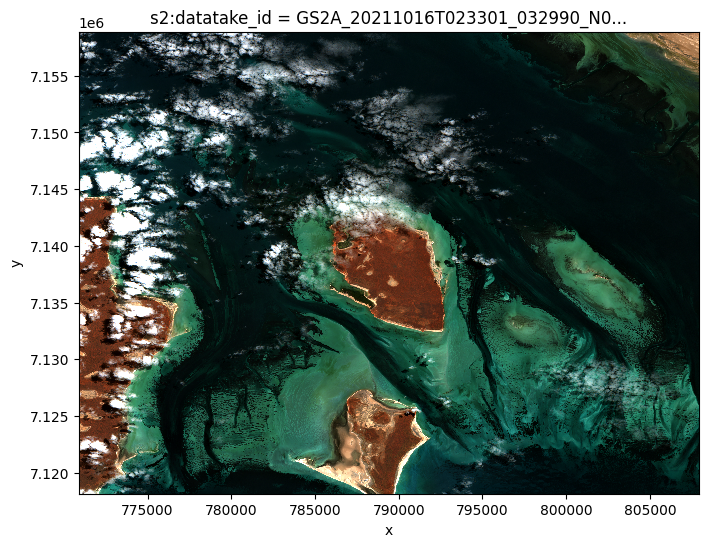

In [13]:
mosaic.plot.imshow(rgb="band", robust=True, size=6)

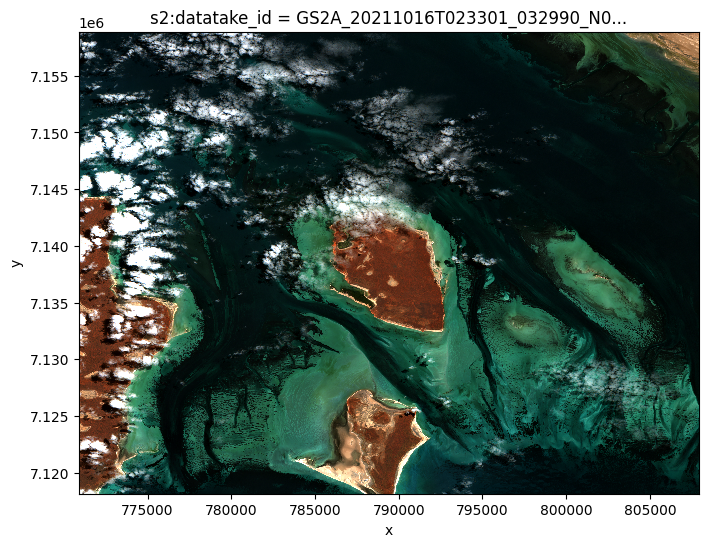

In [14]:

median.plot.imshow(rgb="band", robust=True, size=6)

### time lapse

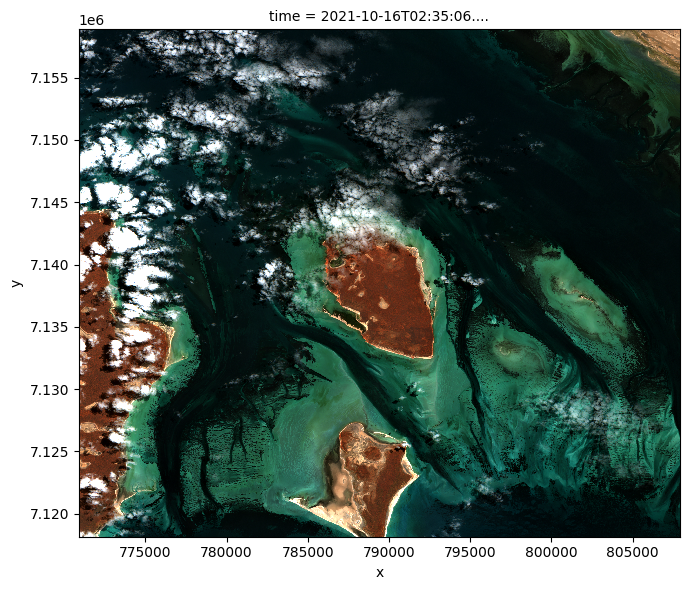

In [15]:
collated_data.plot.imshow(row = 'time', rgb="band", robust=True, size=6)